### What's a Neuron in Neural Networks?

Think of a neuron as a tiny decision-making box in a complex network, similar to a light bulb that turns on under certain conditions. In this notebook, we'll explore how this little box works!


### The Basics

A neuron receives inputs, processes them, and produces an output. Imagine several streams of water flowing into a basin. The basin has a rule: if the total amount of water surpasses a certain level, it will open a gate to let the water out.

In the neuron's case:
- Streams of water = Inputs
- Basin's rule = Activation function
- Opening the gate = Producing an output


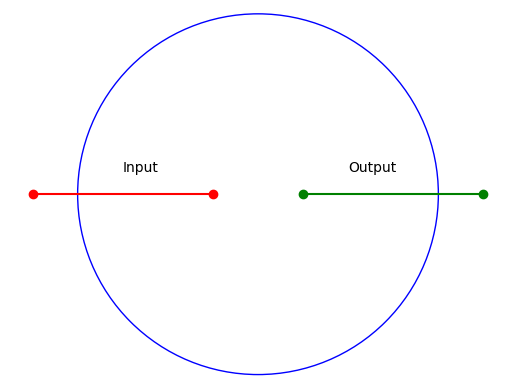

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex


# Draw a basic neuron

fig, ax = plt.subplots()
circle = plt.Circle((0.5, 0.5), 0.4, color='blue', fill=False)
ax.add_artist(circle)
plt.plot([0, 0.4], [0.5, 0.5], 'ro-')  # input
plt.plot([0.6, 1], [0.5, 0.5], 'go-')  # output
ax.annotate('Input', (0.2, 0.55))
ax.annotate('Output', (0.7, 0.55))
ax.set_aspect('equal', adjustable='datalim')
plt.axis('off')
plt.show()



The red line represents the inputs coming into the neuron, while the green line signifies the output.


### Activation Function: The Decision Rule

The neuron uses a rule (called the "activation function") to decide when to "fire" or produce an output.

For simplicity, let's explore a common one: the "step function." If the input surpasses a threshold, it produces an output; otherwise, it stays silent.


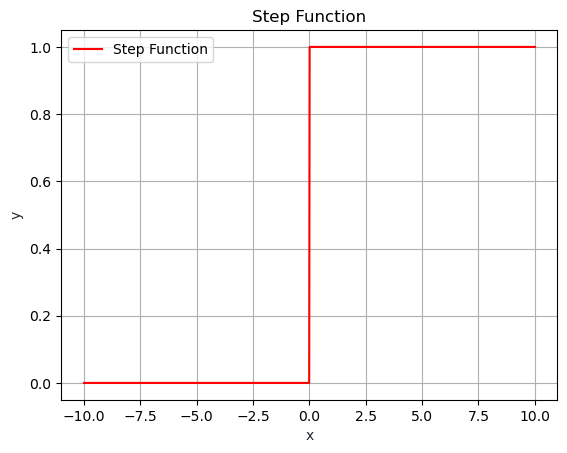

In [2]:
# Plot the step function

x = np.linspace(-10, 10, 1000)
y = np.where(x>0, 1, 0)

plt.plot(x, y, '-r', label='Step Function')
plt.title('Step Function')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()


Here, for any input value to the left of 0, the neuron stays silent (output = 0). But for any input value greater than 0, the neuron "fires" (output = 1).


### Wrapping Up

Now, imagine thousands or even millions of these neurons interconnected, making decisions at every step. That's the essence of a neural network! They learn by adjusting their rules and connections to better fit the data they're given.

In this notebook, we explored just the basics. There's much more depth to neural networks, but understanding the simple neuron is a great start!


### What are Weights and Biases?

Imagine you're baking a cake. The ingredients are like the inputs to our neuron. But not all ingredients are used in the same quantity. You might use more flour and less salt. Similarly, a neuron gives different importance to its various inputs. This importance is called the "weight."

The "bias" is like the secret ingredient your grandma might add to her recipe. It's an additional tweak to make sure the output is just right.

In short:
- **Weights**: How much importance the neuron gives to each input.
- **Bias**: A tweak to adjust the overall output.


In [3]:
# Demonstrate effect of weights and biases on output

inputs = np.array([2, 4])
weights = np.array([1, -0.5])
bias = 1

output = np.dot(inputs, weights) + bias

print(f"Output: {output}")


Output: 1.0


Here, you can see how the weights and bias affect the final output. Adjusting the weights and bias can completely change the output of our neuron!


### What's the Dot Product?

The dot product is a mathematical operation between two vectors that returns a single number (a scalar). If you have two vectors \( a \) and \( b \), their dot product is calculated as:

$ a \cdot b = a_1 \times b_1 + a_2 \times b_2 + \dots + a_n \times b_n $

In words, you multiply each pair of corresponding elements from the vectors together and then sum those products.


The dot product between `inputs` and `weights` is:

$ \text{dot\_product} = 2 \times 1 + 4 \times (-0.5) $

$ \text{dot\_product} = 2 - 2 $

$ \text{dot\_product} = 0 $

Therefore, the result of the dot product is 0.

Finally, add the bias to the dot product as in the example above: 

$ \text{output} = \text{dot\_product} + \text{bias} = 0 + 1 = 1 $

### Beyond the Step Function: Other Activation Functions

The step function is straightforward, but in practice, neural networks use more complex activation functions. These functions allow for subtle decisions, not just "on" or "off." Let's explore a few.


#### Sigmoid Activation Function

The sigmoid function gives an output between 0 and 1. It's like a softer version of the step function.


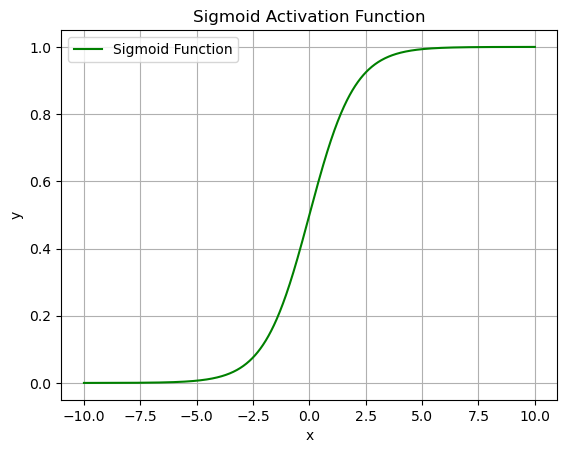

In [4]:
# Plot the sigmoid function

x = np.linspace(-10, 10, 1000)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y, '-g', label='Sigmoid Function')
plt.title('Sigmoid Activation Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


#### ReLU Activation Function

ReLU stands for "Rectified Linear Unit." It's a simple rule: if the input is positive, output the same value; if it's negative, output zero.


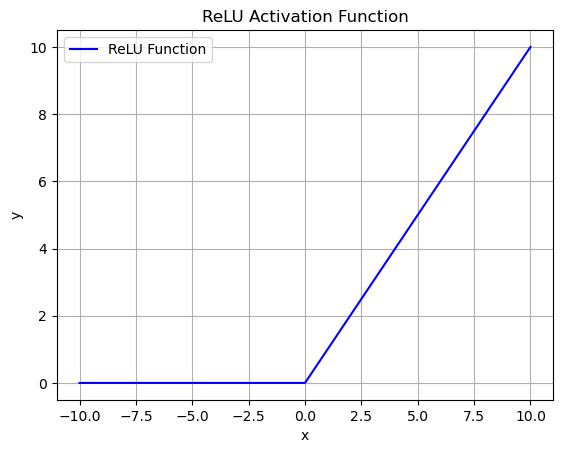

In [5]:
# Plot the ReLU function

y = np.maximum(0, x)

plt.plot(x, y, '-b', label='ReLU Function')
plt.title('ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


### tanh Activation Function

The hyperbolic tangent function, commonly referred to as `tanh`, is another popular activation function used in neural networks. It is similar to the sigmoid function but scales its output to the range between -1 and 1, making the mean output value approximately zero. This can help combat issues like the vanishing gradient problem to some extent.

Mathematically, the `tanh` function is defined as:

$ \text{tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $

The function squashes any input into the range [-1, 1]. This means that even if the weighted sum of the neuron's inputs is large in magnitude, it will be squashed to fit within this range.

Let's implement and visualize the `tanh` function:


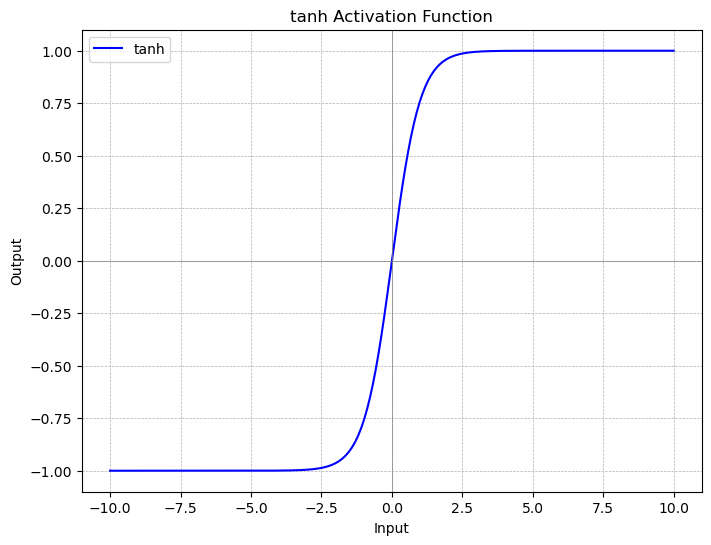

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return np.tanh(x)

# Generate values
x_values = np.linspace(-10, 10, 400)
y_values = tanh(x_values)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label="tanh", color="blue")
plt.axhline(0, color="gray",linewidth=0.5)
plt.axvline(0, color="gray",linewidth=0.5)
plt.title("tanh Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


From the plot, you can observe the S-shaped curve of the `tanh` function. It is steeper than the sigmoid, allowing for stronger gradients, and its output is centered around zero, which can help during the training process of a neural network.


### Neuron with Multiple Inputs

A neuron in a neural network receives inputs from several sources, each with its own associated weight. The function of each neuron is to take these inputs, multiply them by their respective weights, and produce a single output. 

#### Mathematical Representation

Let's say we have a neuron with \( n \) inputs. The inputs are represented as a vector:

$ \mathbf{I} = [i_1, i_2, \dots, i_n] $

The weights associated with each of these inputs are represented as:

$ \mathbf{W} = [w_1, w_2, \dots, w_n] $

The neuron computes a weighted sum of its inputs:

$ \text{Weighted Sum} = i_1 \times w_1 + i_2 \times w_2 + \dots + i_n \times w_n $

This can be compactly represented using the dot product:

$ \text{Weighted Sum} = \mathbf{I} \cdot \mathbf{W} $

Finally, a bias \( b \) is added:

$ \text{Output Before Activation} = \mathbf{I} \cdot \mathbf{W} + b $

#### Activation Function

After the neuron calculates the weighted sum and adds the bias, this value is typically passed through an activation function. This function introduces non-linearity and decides how the neuron should "fire" or "activate" based on the input it receives.

Common activation functions include the sigmoid function, ReLU (Rectified Linear Unit), and tanh, among others. The choice of activation function often depends on the specific use case and the nature of the data.

#### Example:

Consider a neuron with 3 inputs:

$ \mathbf{I} = [2, 1, 3] $

And associated weights:

$ \mathbf{W} = [0.5, -0.5, 0.25] $

With a bias:

$ b = 1 $

The output before activation is:

$ \text{Output} = 2 \times 0.5 + 1 \times (-0.5) + 3 \times 0.25 + 1 $
$ \text{Output} = 2.25 $

If we were to use a sigmoid activation function, this value would be transformed to fit between 0 and 1, representing the probability or "firing strength" of the neuron.

### Conclusion:

A neuron with multiple inputs works by computing a weighted sum of all its inputs and then passing that sum through an activation function. The weights and biases are parameters that get adjusted during the training process, allowing the neural network to make accurate predictions or classifications based on input data.


In [7]:
import numpy as np

# Given inputs and weights
I = np.array([2, 1, 3])
W = np.array([0.5, -0.5, 0.25])

# Compute weighted sum
weighted_sum = np.dot(I, W)

# Given bias
b = 1

# Compute output before activation
output_before_activation = weighted_sum + b
output_before_activation


np.float64(2.25)

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Apply sigmoid activation function
activated_output = sigmoid(output_before_activation)
activated_output


np.float64(0.9046505351008906)

### Weights and Biases in Neural Networks

#### Locality of Weights:

Each neuron in a neural network has its own set of weights and a bias associated with it. These weights are specific to the connections between that neuron and the neurons from the previous layer.

For example, in a fully connected layer, if there are \( m \) neurons in the current layer and \( n \) neurons in the previous layer, there will be a total of \( m \times n \) weights in that layer — each of the \( m \) neurons will have \( n \) weights associated with it (one for each connection to the neurons in the previous layer). Each of these \( m \) neurons will also have its own bias.

#### Backpropagation and Weight/Bias Adjustment:

Backpropagation is the key algorithm used to adjust the weights and biases in a neural network during training. The main idea is to minimize the difference (error) between the predicted output and the actual target values. This is achieved by computing the gradient of the loss function with respect to each weight and bias in the network. The gradient indicates the direction and magnitude of changes needed to reduce the error.

**Steps for Backpropagation:**

1. **Forward Pass**: Compute the output of the network given the input data. This involves passing the input data through each layer of the network, applying weights, biases, and activation functions.
  
2. **Compute the Loss**: Determine how far off the network's predictions are from the actual targets. This is usually done using a loss function like Mean Squared Error for regression tasks or Cross-Entropy Loss for classification tasks.

3. **Backward Pass**: Calculate the gradient of the loss with respect to each weight and bias by applying the chain rule of calculus. This process starts from the output layer and works backward through each layer.

4. **Update Weights and Biases**: Adjust the weights and biases in the direction that reduces the error. This is typically done using optimization algorithms like Gradient Descent or its variants (e.g., Stochastic Gradient Descent, Adam).

During backpropagation, each weight and bias is adjusted in a way that would reduce the error made by the network on the current input data. Over many iterations (epochs) of showing the network multiple input-output pairs and adjusting weights and biases via backpropagation, the network learns to make more accurate predictions.

#### Conclusion:

Yes, weights are local to every neuron, and during the backpropagation process, both weights and biases are readjusted to minimize the error in the network's predictions. This iterative process of forward pass, loss computation, backward pass, and weight/bias update is the essence of training a neural network.
